In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
corr = pokemon.corr()
#corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\EL_GHI~1\AppData\Local\Temp/ipykernel_19168/3206963981.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
id,1.00,0.99,0.03,0.13,0.14,0.10,0.16,0.14,0.03,0.13,0.13
generation_id,0.99,1.00,-0.01,0.10,0.10,0.07,0.12,0.10,0.00,0.09,0.08
height,0.03,-0.01,1.00,0.64,0.49,0.46,0.41,0.36,0.19,0.35,0.31
weight,0.13,0.10,0.64,1.00,0.42,0.41,0.38,0.45,0.03,0.22,0.30
base_experience,0.14,0.10,0.49,0.42,1.00,0.67,0.60,0.52,0.50,0.67,0.67
hp,0.10,0.07,0.46,0.41,0.67,1.00,0.43,0.23,0.17,0.38,0.37
attack,0.16,0.12,0.41,0.38,0.60,0.43,1.00,0.44,0.34,0.33,0.20
defense,0.14,0.10,0.36,0.45,0.52,0.23,0.44,1.00,-0.02,0.20,0.51
speed,0.03,0.00,0.19,0.03,0.50,0.17,0.34,-0.02,1.00,0.44,0.20
special-attack,0.13,0.09,0.35,0.22,0.67,0.38,0.33,0.20,0.44,1.00,0.48


# Task 1 : How many were Pokemon in each generation? 
- Create a bar chart of these frequencies using the 'generation_id' column.


<AxesSubplot:xlabel='generation_id', ylabel='count'>

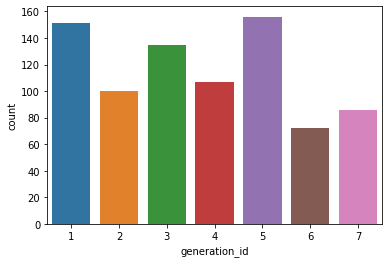

In [6]:
# base_color = sb.color_palette()[0]

sb.countplot(data=pokemon , x='generation_id' )

# Task 2: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type?

In [7]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [ ]:
 type_counts = pkmn_types['type'].value_counts() # type_counts : ordered by frequency 
type_order = type_counts.index #type_order: each count's respond type


# compute the largest proportion   max frequency / total unique species
num_pokemon = pkmn_types['species'].unique().shape[0] # .shape gives (807,) so need to access 0 index
max_type_count = type_counts[0] # get the first type count 
max_prop = max_type_count / num_pokemon


# establishb tick locations and create plots 
tick_props = np.arange(0,max_prop , 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot( data = pkmn_types , y = 'type',color=base_color, order = type_order)
# too many types, use y axis is easier to list 
plt.xticks( tick_props*num_pokemon , tick_names )
plt.xlabel('proportion')